In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [11]:
from sklearn.datasets import load_iris

iris_data = load_iris()

In [12]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

In [16]:
iris['target'] = iris_data.target

In [17]:
x = iris
y = iris['target']

In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)

model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.6, 0.8333333333333334, 'x[4] <= 1.5\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.4, 0.5, 'x[2] <= 2.45\ngini = 0.499\nsamples = 77\nvalue = [40.0, 37.0, 0.0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]'),
 Text(0.7, 0.6666666666666667, '  False')]

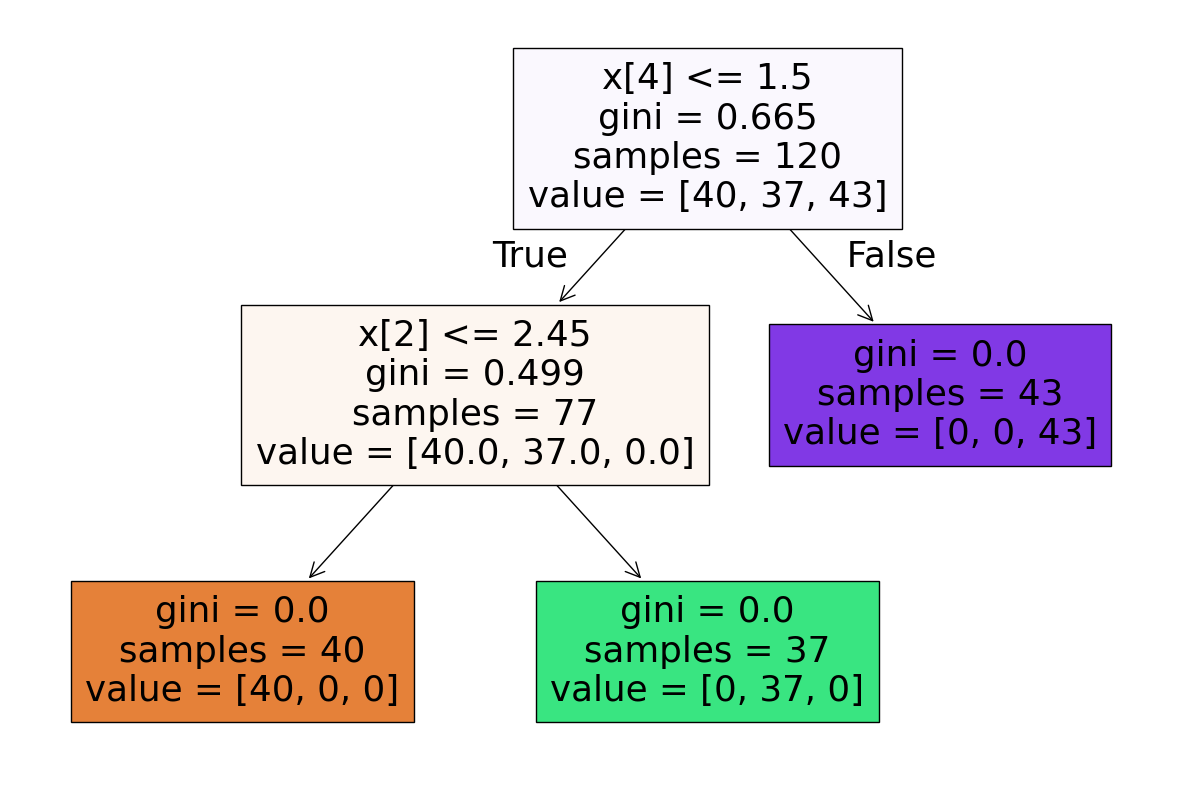

In [29]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [30]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

acc= accuracy_score(y_pred,y_test)
con = confusion_matrix(y_pred,y_test)
report = classification_report(y_pred,y_test)

print(acc)
print(con)
print(report)

1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Decision Tree Classifer Prepruning And Hyperparameter Tuning

In [36]:
param = {
    'criterion' :['gini','entropy','log_loss'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt','log2']
}

In [37]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model,param_grid=param,scoring='accuracy',n_jobs=-1,cv = 5)

In [38]:
grid.fit(x_train,y_train)

/Users/sankar/Documents/Udemy AI /venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sankar/Documents/Udemy AI /venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sankar/Documents/Udemy AI /venv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/sankar/Documents/Udemy AI /venv/lib/python3.12/site-packages/sklearn/base.py", line 436, in _v

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [39]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'random'}

In [40]:
grid.best_score_

np.float64(1.0)

In [41]:
y_pred = grid.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

acc= accuracy_score(y_pred,y_test)
con = confusion_matrix(y_pred,y_test)
report = classification_report(y_pred,y_test)

print(acc)
print(con)
print(report)

1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Diabetes prdiction using Decision Tree Regression

In [42]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [43]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [44]:
diabetes = pd.DataFrame(data.data,columns=data.feature_names)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [45]:
diabetes['target'] = data.target

In [46]:
x = diabetes
y = diabetes['target']

In [47]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [48]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [50]:
from sklearn.tree import DecisionTreeRegressor

regmodel = DecisionTreeRegressor()

regmodel.fit(x_train,y_train)

DecisionTreeRegressor()

## Hyperparameter Tuning

In [53]:
params = {
    'criterion' :['squared_error','friedman_mse','absolute_error'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt','log2']
}

In [58]:
from sklearn.model_selection import GridSearchCV

gridcv = GridSearchCV(estimator=regmodel,param_grid=params,scoring='neg_mean_squared_error',cv= 5,n_jobs=-1) 

In [60]:
import warnings
warnings.filterwarnings('ignore')
gridcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [61]:
gridcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [62]:
y_pred = gridcv.predict(x_test)

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)

print(mae)
print(mse)
print(r2)

42.64372016285308
2879.3351604398117
0.37348550070202513


In [64]:
model = DecisionTreeRegressor(criterion='friedman_mse',max_depth= 5,max_features='log2',splitter='best')
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='log2')

[Text(0.5, 0.9166666666666666, 'x[8] <= -0.0\nfriedman_mse = 5845.82\nsamples = 353\nvalue = 152.918'),
 Text(0.25, 0.75, 'x[8] <= -0.036\nfriedman_mse = 3179.573\nsamples = 183\nvalue = 113.268'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[2] <= 0.003\nfriedman_mse = 2080.731\nsamples = 81\nvalue = 95.099'),
 Text(0.0625, 0.4166666666666667, 'x[10] <= 110.5\nfriedman_mse = 1694.723\nsamples = 65\nvalue = 87.985'),
 Text(0.03125, 0.25, 'x[10] <= 66.5\nfriedman_mse = 355.466\nsamples = 50\nvalue = 68.88'),
 Text(0.015625, 0.08333333333333333, 'friedman_mse = 71.236\nsamples = 23\nvalue = 51.739'),
 Text(0.046875, 0.08333333333333333, 'friedman_mse = 134.102\nsamples = 27\nvalue = 83.481'),
 Text(0.09375, 0.25, 'x[0] <= -0.022\nfriedman_mse = 886.889\nsamples = 15\nvalue = 151.667'),
 Text(0.078125, 0.08333333333333333, 'friedman_mse = 691.01\nsamples = 10\nvalue = 140.3'),
 Text(0.109375, 0.08333333333333333, 'friedman_mse = 503.44\nsamples = 5\nvalu

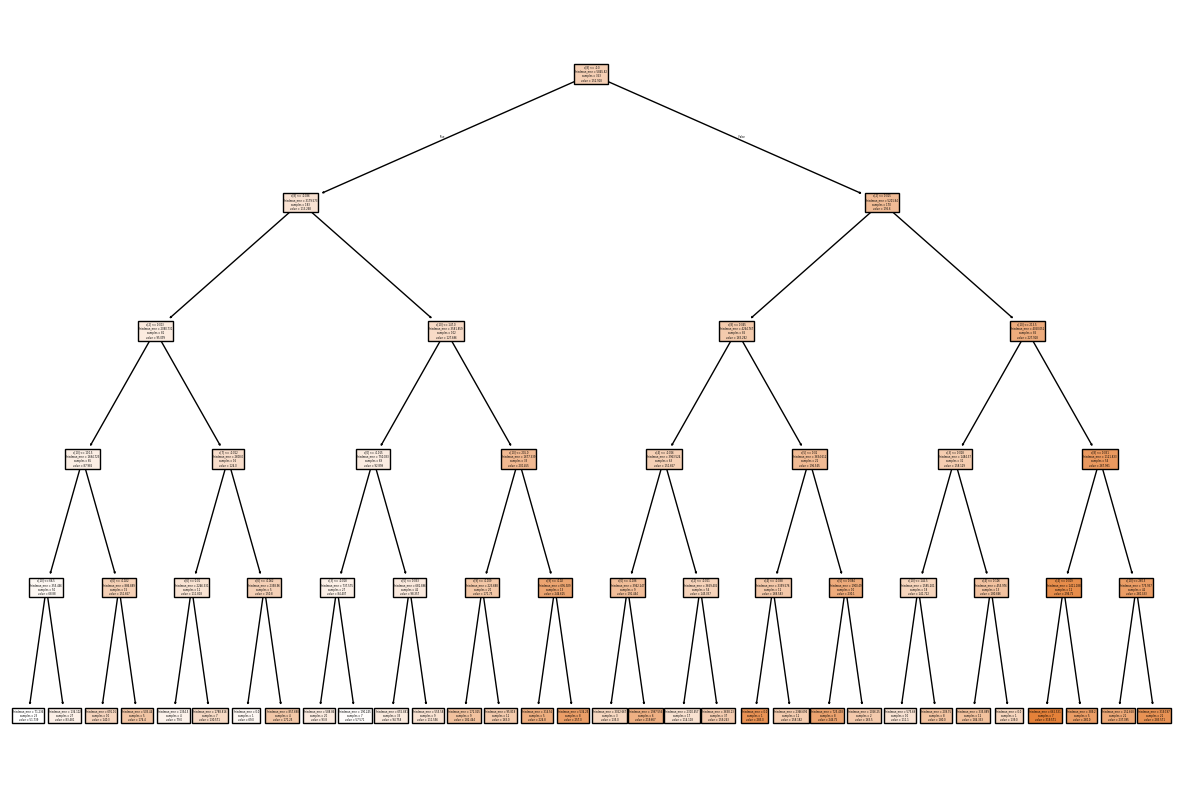

In [65]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)